# Assignment 2 : Predicting California Housing Prices Using Multiple and Polynomial Regression

## Importing Libraries

In [19]:
# Import Required Packages

# numerical manipulation libraries
import pandas as pd
import numpy as np
from math import sqrt

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error




## Data Preprocessing

### Data Importing

In [20]:
data_directory=r'G:\My Drive\Phd Courses\CS 5841- Machine Learning\Assignments\2\housing.csv'
df = pd.read_csv(data_directory)
df.head()

# data_directory = 'data/housing.csv'
# df = pd.read_csv(data_directory)
# df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


### Handling Missing Values

In [21]:
# Quick overview of how many missing values are in each column
print("Missing values in each column before filling:")
print(df.isnull().sum())

# Get the size of the imported data
imported_data_size = df.shape
print("\nImported data size:", imported_data_size)

### important point: filling missing data with mean values of the column, because replacement by zero is not nuetural and chnage the distrubion porbability function 

for i in range(imported_data_size[0]):
    for j in range(imported_data_size[1]):
        if pd.isnull(df.iloc[i, j]):
            mean_value = df.iloc[:, j].mean(skipna=True)
            df.fillna(mean_value, inplace=True)

print("Missing values in each column after filling:")
print(df.isnull().sum())

Missing values in each column before filling:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Imported data size: (20640, 10)
Missing values in each column after filling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Feature Engineering

#### Feature Engineering: Inter-Correlation Analysis and Multicollinearity Removal ; V1: Basic Features

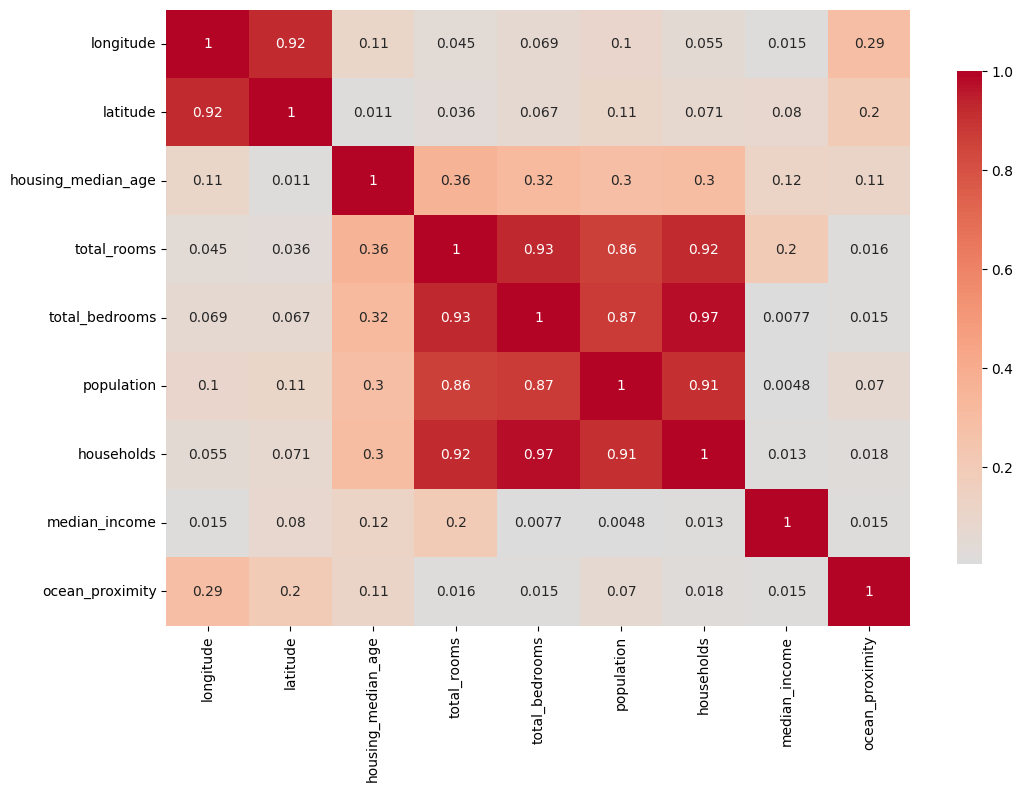

[1, 4, 5, 6]
(20640, 9)


In [108]:
from sklearn.preprocessing import LabelEncoder

# we have a string column which we shold convert to label using label encoder function

lbencoder=LabelEncoder()
df['ocean_proximity']=lbencoder.fit_transform(df['ocean_proximity'])

X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
y = df[['median_house_value']]


################################################################################################################
############## If we uncomment this part, It will remove outliers by the "Iterquartile Range (IQR) Method"
################################################################################################################
# # Assuming df is your DataFrame
# # Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Define the bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out the outliers
# df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# print(f"Original DataFrame shape: {df.shape}")
# print(f"Filtered DataFrame shape: {df_filtered.shape}")


# # Select features and target variable
# X = df_filtered[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
# y = df_filtered[['median_house_value']]

################################################################################################################
################################################################################################################
################################################################################################################
address = "G:\\My Drive\\Phd Courses\\CS 5841- Machine Learning\\Assignments\\2\\Plots"
# Calculate the correlation matrix
corr_matrix = X.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'shrink': 0.8}, center=0)
plt.savefig(f"{address}\\correlation_matrix.png", dpi=600, bbox_inches='tight')
plt.show()

# Identify highly correlated features
upper_triangle = np.triu(corr_matrix.values)
threshold = 0.8
dropped_columns_nums = []

# Finding a list of highly correlated features to be removed later 
for i in range(upper_triangle.shape[0]):
    if i not in dropped_columns_nums:
        for j in range(upper_triangle.shape[1]):
            if i != j:
                if upper_triangle[i, j] > threshold:
                    dropped_columns_nums.append(j)

print(dropped_columns_nums)

################################################################################################################
########## With this line we can manually select some features to be removed to do a sensitivity analysis later.
# you can commnet it, if want to rely on above automatic correlation detection
################################################################################################################

dropped_columns_nums=[]

################################################################################################################




# Drop highly correlated features using .loc to avoid SettingWithCopyWarning
X = X.loc[:, ~X.columns.isin(X.columns[dropped_columns_nums])]



################################################################################################################
########### With this part we try to apply the log transform to features to smooth the feature space 
################################################################################################################

X_np = np.where(X <= 0, 1e-9, X)
X_np = np.log(X_np + 1)

################################################################################################################

# this line is to circumvent log transform
X_np=X



# Convert X back to a DataFrame with the remaining column names
X = pd.DataFrame(X_np, columns=X.columns)

print(X.shape)

#### Feature Engineering: Inter-Correlation Analysis and Multicollinearity Removal ; V2 : Adding Basic Interactive Features

Original DataFrame shape: (20640, 10)
Filtered DataFrame shape: (13480, 10)


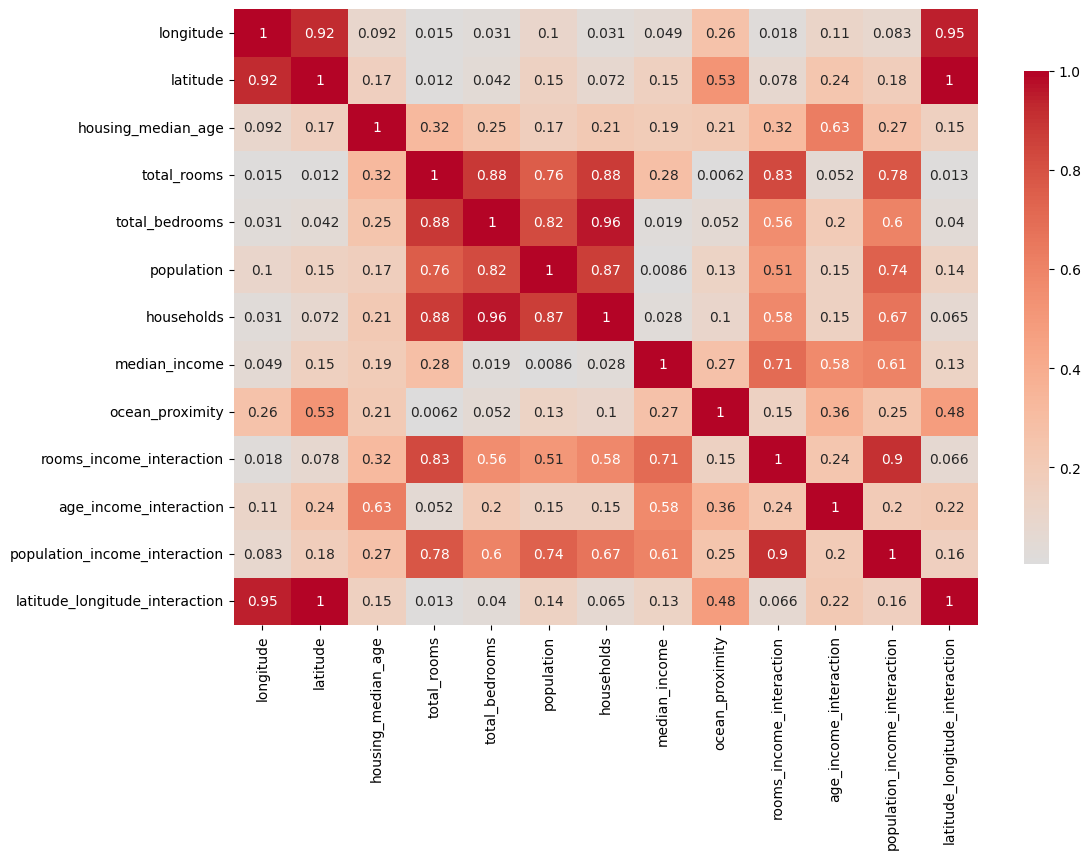

[1, 12, 4, 6, 9, 6]
(13480, 8)


In [99]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'ocean_proximity' column
lbencoder = LabelEncoder()
df['ocean_proximity'] = lbencoder.fit_transform(df['ocean_proximity'])

# # Select features and target variable
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
y = df[['median_house_value']]




###############################################################################################################
############# If we uncomment this part, It will remove outliers by the "Iterquartile Range (IQR) Method"
###############################################################################################################
# Assuming df is your DataFrame
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df_filtered.shape}")


# Select features and target variable
X = df_filtered[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
y = df_filtered[['median_house_value']]

################################################################################################################
################################################################################################################
################################################################################################################




# Adding four basic interactive features

X['rooms_income_interaction'] = X['total_rooms'] * X['median_income']

X['age_income_interaction'] = X['housing_median_age'] * X['median_income']

X['population_income_interaction'] = X['population'] * X['median_income']

X['latitude_longitude_interaction'] = X['latitude'] * X['longitude']



# Calculate the correlation matrix
corr_matrix = X.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'shrink': 0.8}, center=0)
plt.savefig(f"{address}\\correlation_matrix2.png", dpi=600, bbox_inches='tight')
plt.show()

# Identify highly correlated features
upper_triangle = np.triu(corr_matrix.values)
threshold = 0.8
dropped_columns_nums = []

# Finding a list of highly correlated features to be removed later 
for i in range(upper_triangle.shape[0]):
    if i not in dropped_columns_nums:
        for j in range(upper_triangle.shape[1]):
            if i != j:
                if upper_triangle[i, j] > threshold:
                    dropped_columns_nums.append(j)

print(dropped_columns_nums)

################################################################################################################
########## With this line we can manually select some features to be removed to do a sensitivity analysis later.
# you can commnet it, if want to rely on above automatic correlation detection
################################################################################################################

# dropped_columns_nums=[]

################################################################################################################




# Drop highly correlated features using .loc to avoid SettingWithCopyWarning
X = X.loc[:, ~X.columns.isin(X.columns[dropped_columns_nums])]



################################################################################################################
########### With this part we try to apply the log transform to features to smooth the feature space 
################################################################################################################

X_np = np.where(X <= 0, 1e-9, X)
X_np = np.log(X_np + 1)

################################################################################################################

# this line is to circumvent log transform
X_np=X



# Convert X back to a DataFrame with the remaining column names
X = pd.DataFrame(X_np, columns=X.columns)

print(X.shape)


#### Features Distribution Demonstration

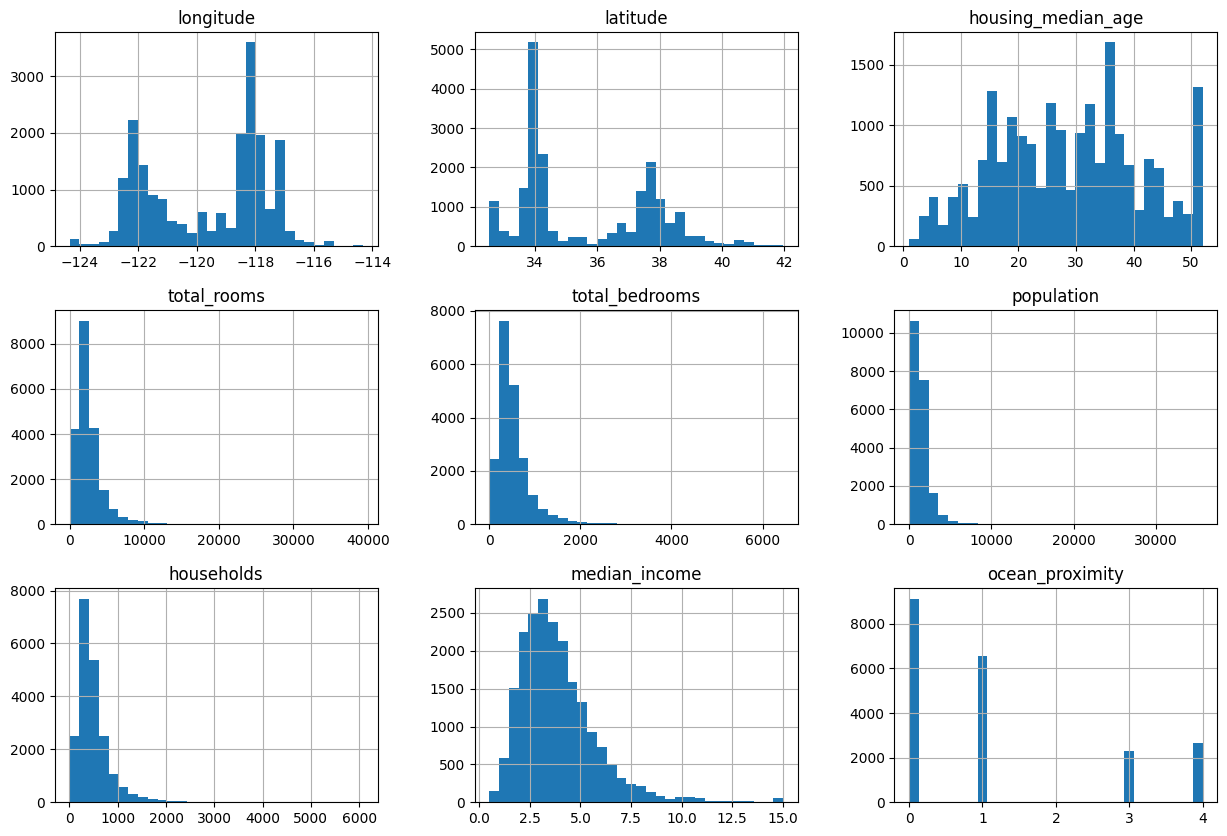

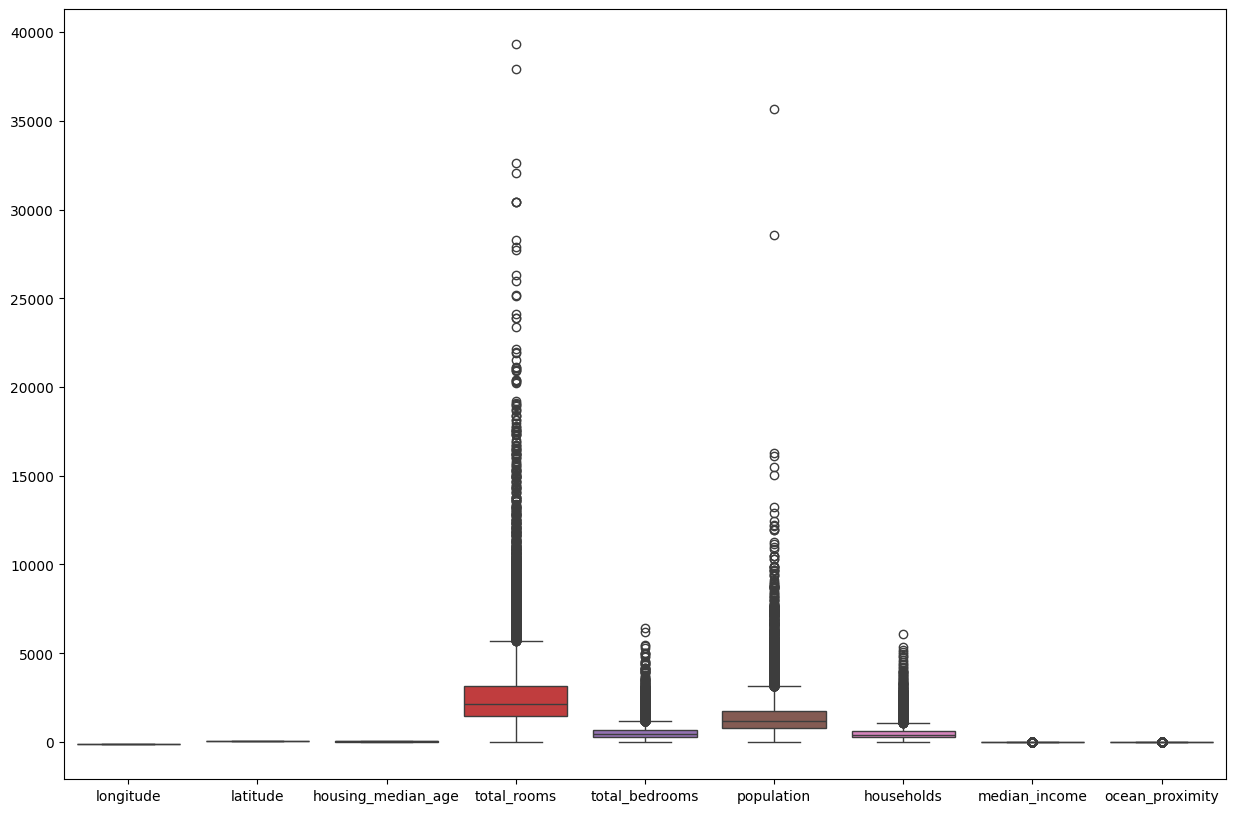

In [13]:
# Histograms
X.hist(bins=30, figsize=(15, 10))
plt.savefig(f"{address}\\histograms_.png", dpi=600, bbox_inches='tight')
plt.show()

# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.savefig(f"{address}\\barplots_", dpi=600, bbox_inches='tight')
plt.show()


#### Features Space Normalization

In [109]:


# from sklearn.preprocessing import StandardScaler

# # Scale the features using mean and standard deviation
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(X)
# scaled_X = pd.DataFrame(scaled_data, columns=X.columns)
# # print(scaled_df)
# scaled_X.head()





##############
# we can uncomment this part to use the minmax scaler instead of above option
##############

from sklearn.preprocessing import MinMaxScaler

# Scale the features using minmax scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_data, columns=X.columns)

scaled_X.head()


##############
## we this line we can circumvent the normalization step
##############

# scaled_X=X




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.75


## Modeling

### Train test split

In [110]:
# spliting data to training and testing; *80% train and 20% test; "random_state=42" ensures consistant random selection thorough multiple runds

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)


### Model 1: Multiple Linear Regression Model

0
0
Root Mean Squared Error (RMSE) for Training Data: 51745.40089349899
Root Mean Squared Error (RMSE) for Testing Data: 53729.080014718296
R-squared (R²) for Training Data: 0.6602836757128709
R-squared (R²) for Testing Data: 0.6440228313151314
Mean Residual Percentage: 25.15%
Coefficient of Variation (CV): 0.9706


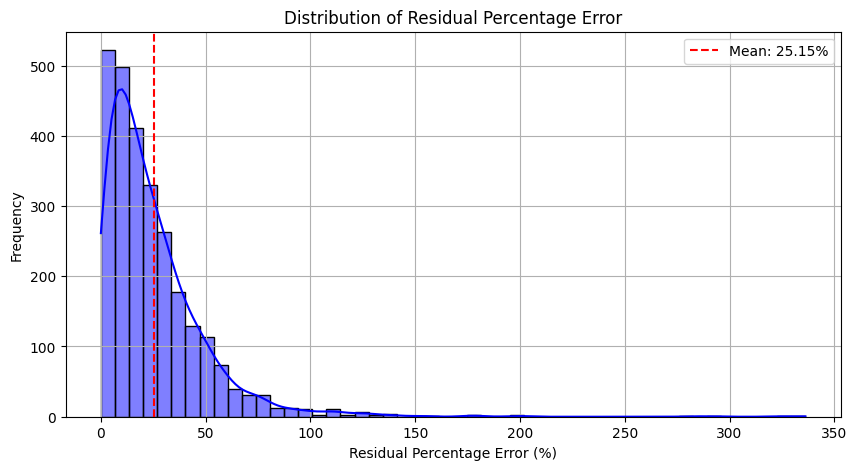

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the stock prices on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))  # Root Mean Squared Error for training data
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))  # Root Mean Squared Error for testing data
r2_train = r2_score(y_train, y_train_pred)  # R-squared for training data
r2_test = r2_score(y_test, y_test_pred)  # R-squared for testing data

# --- Residual Percentage Calculation ---
residuals = np.abs(y_test.values.flatten() - y_test_pred.flatten())  # Absolute residuals
residual_percentage = (residuals / y_test.values.flatten()) * 100  # Percentage error
mean_residual_percentage = np.mean(residual_percentage)  # Average residual percentage

# Check for NaN or infinite values
print(np.isnan(residual_percentage).sum())  # Should be 0
print(np.isinf(residual_percentage).sum())  # Should be 0

# --- Coefficient of Variation (CV) Calculation ---
mae = mean_absolute_error(y_test, y_test_pred)
residual_std = np.std(residuals)  # Standard deviation of residuals
cv = residual_std / mae  # Coefficient of Variation

# Print metrics
print(f'Root Mean Squared Error (RMSE) for Training Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) for Testing Data: {rmse_test}')
print(f'R-squared (R²) for Training Data: {r2_train}')
print(f'R-squared (R²) for Testing Data: {r2_test}')
print(f"Mean Residual Percentage: {mean_residual_percentage:.2f}%")
print(f"Coefficient of Variation (CV): {cv:.4f}")

# --- Residual Percentage Distribution Plot ---
plt.figure(figsize=(10, 5))
sns.histplot(residual_percentage, bins=50, kde=True, color="blue")
plt.xlabel("Residual Percentage Error (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Residual Percentage Error")
plt.axvline(mean_residual_percentage, color="red", linestyle="dashed", label=f"Mean: {mean_residual_percentage:.2f}%")
plt.legend()
plt.grid(True)
plt.show()

### Model 2: Polynomial Regression

0
0
Root Mean Squared Error (RMSE) for Training Data: 52646.75757052259
Root Mean Squared Error (RMSE) for Testing Data: 54717.489117244855
R-squared (R²) for Training Data: 0.6483455138742548
R-squared (R²) for Testing Data: 0.6308051313584853
Mean Residual Percentage: 25.63%
Coefficient of Variation (CV): 0.9761


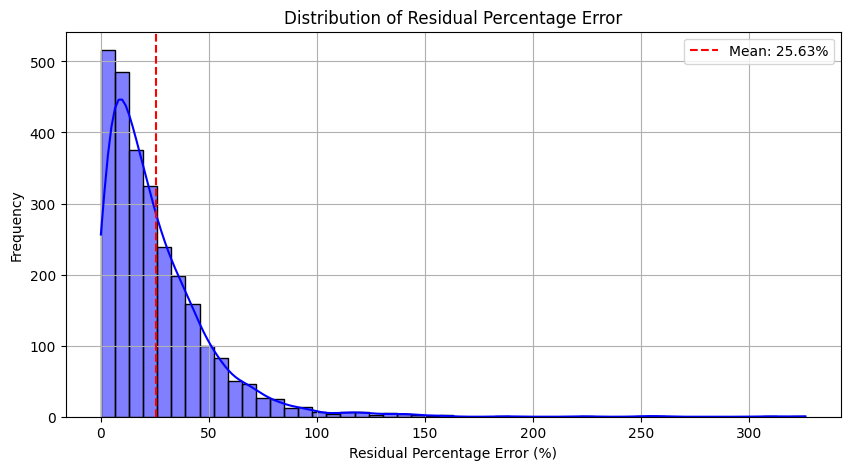

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate polynomial features
poly = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a regression model on the transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test_poly)

# Predict the stock prices on the training and test sets
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate metrics
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))  # Root Mean Squared Error for training data
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))  # Root Mean Squared Error for testing data
r2_train = r2_score(y_train, y_train_pred)  # R-squared for training data
r2_test = r2_score(y_test, y_test_pred)  # R-squared for testing data

# --- Residual Percentage Calculation ---
residuals = np.abs(y_test.values.flatten() - y_test_pred.flatten())  # Absolute residuals
residual_percentage = (residuals / y_test.values.flatten()) * 100  # Percentage error
mean_residual_percentage = np.mean(residual_percentage)  # Average residual percentage

# Check for NaN or infinite values
print(np.isnan(residual_percentage).sum())  # Should be 0
print(np.isinf(residual_percentage).sum())  # Should be 0

# --- Coefficient of Variation (CV) Calculation ---
mae = mean_absolute_error(y_test, y_test_pred)
residual_std = np.std(residuals)  # Standard deviation of residuals
cv = residual_std / mae  # Coefficient of Variation

# Print metrics
print(f'Root Mean Squared Error (RMSE) for Training Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) for Testing Data: {rmse_test}')
print(f'R-squared (R²) for Training Data: {r2_train}')
print(f'R-squared (R²) for Testing Data: {r2_test}')
print(f"Mean Residual Percentage: {mean_residual_percentage:.2f}%")
print(f"Coefficient of Variation (CV): {cv:.4f}")

# --- Residual Percentage Distribution Plot ---
plt.figure(figsize=(10, 5))
sns.histplot(residual_percentage, bins=50, kde=True, color="blue")
plt.xlabel("Residual Percentage Error (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Residual Percentage Error")
plt.axvline(mean_residual_percentage, color="red", linestyle="dashed", label=f"Mean: {mean_residual_percentage:.2f}%")
plt.legend()
plt.grid(True)
plt.show()

### Model 3 : XGBRegressior

Model Performance:
Training RMSE: 15181.09
Training R² Score: 0.9708
Testing RMSE: 46450.83
Testing R² Score: 0.7339
Mean Residual Percentage: 20.87%
Coefficient of Variation (CV): 1.0369


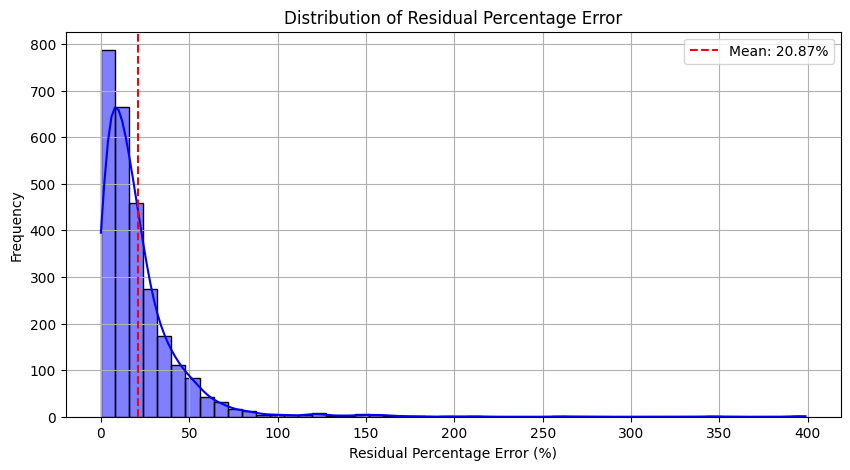

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Train XGBoost Regressor ---
xgb_model = XGBRegressor(
    n_estimators=800,  # Increase for better performance
    learning_rate=0.1,  # Slower but better generalization
    max_depth=6,  # Control overfitting
    subsample=0.8,  # Use part of the dataset to avoid overfitting
    colsample_bytree=0.6,  # Feature selection
    random_state=42
)

xgb_model.fit(X_train, y_train)

# --- Training Set Predictions and Metrics ---
y_train_pred = xgb_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# --- Model Evaluation on Test Set ---
y_pred = xgb_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# --- Residual Percentage Calculation ---
residuals = np.abs(y_test.values.flatten() - y_pred)  # Absolute residuals
residual_percentage = (residuals / y_test.values.flatten()) * 100  # Percentage error
mean_residual_percentage = np.mean(residual_percentage)  # Average residual percentage

# --- Coefficient of Variation (CV) Calculation ---
residual_std = np.std(residuals)  # Standard deviation of residuals
cv = residual_std / mae  # Coefficient of Variation

# --- Print Metrics ---
print(f"Model Performance:")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Training R² Score: {r2_train:.4f}")
print(f"Testing RMSE: {rmse:.2f}")
print(f"Testing R² Score: {r2:.4f}")
print(f"Mean Residual Percentage: {mean_residual_percentage:.2f}%")
print(f"Coefficient of Variation (CV): {cv:.4f}")

# --- Residual Percentage Distribution Plot ---
plt.figure(figsize=(10, 5))
sns.histplot(residual_percentage, bins=50, kde=True, color="blue")
plt.xlabel("Residual Percentage Error (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Residual Percentage Error")
plt.axvline(mean_residual_percentage, color="red", linestyle="dashed", label=f"Mean: {mean_residual_percentage:.2f}%")
plt.legend()
plt.grid(True)
plt.show()


### Model 4: Deep Learning Sequential

Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 55992578048.0000 - val_loss: 56198557696.0000
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 53568155648.0000 - val_loss: 51433545728.0000
Epoch 3/100
413/413 [==============================] - 1s 1ms/step - loss: 46067363840.0000 - val_loss: 41297842176.0000
Epoch 4/100
413/413 [==============================] - 1s 1ms/step - loss: 34254379008.0000 - val_loss: 28586758144.0000
Epoch 5/100
413/413 [==============================] - 1s 1ms/step - loss: 22533134336.0000 - val_loss: 18529353728.0000
Epoch 6/100
413/413 [==============================] - 1s 1ms/step - loss: 15272213504.0000 - val_loss: 13915681792.0000
Epoch 7/100
413/413 [==============================] - 1s 1ms/step - loss: 12757383168.0000 - val_loss: 12777071616.0000
Epoch 8/100
413/413 [==============================] - 1s 1ms/step - loss: 12240713728.0000 - val_loss: 12524640256.0000
Epoch 9/100
413/413 [===========

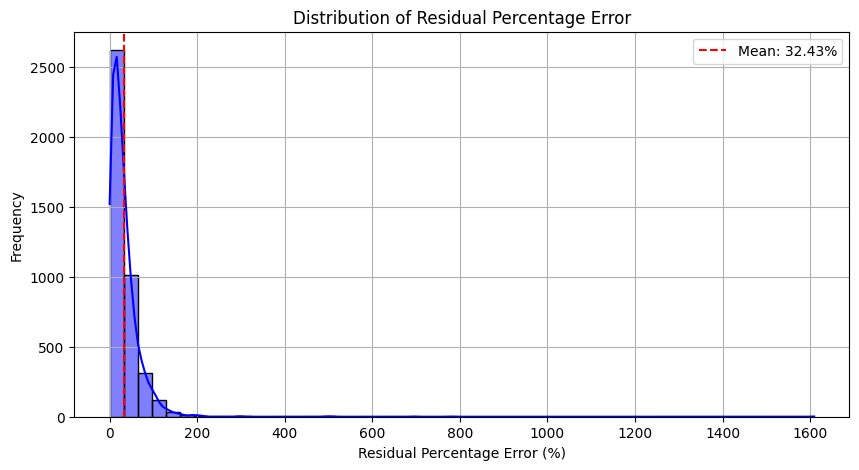

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict on the test set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# --- Residual Percentage Calculation ---
residuals = np.abs(y_test.values.flatten() - y_test_pred.flatten())  # Absolute residuals
residual_percentage = (residuals / y_test.values.flatten()) * 100  # Percentage error
mean_residual_percentage = np.mean(residual_percentage)  # Average residual percentage

# --- Coefficient of Variation (CV) Calculation ---
mae = mean_absolute_error(y_test, y_test_pred)
residual_std = np.std(residuals)  # Standard deviation of residuals
cv = residual_std / mae  # Coefficient of Variation

# Print metrics
print(f'Root Mean Squared Error (RMSE) for Training Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) for Testing Data: {rmse_test}')
print(f'R-squared (R²) for Training Data: {r2_train}')
print(f'R-squared (R²) for Testing Data: {r2_test}')
print(f"Mean Residual Percentage: {mean_residual_percentage:.2f}%")
print(f"Coefficient of Variation (CV): {cv:.4f}")

# --- Residual Percentage Distribution Plot ---
plt.figure(figsize=(10, 5))
sns.histplot(residual_percentage, bins=50, kde=True, color="blue")
plt.xlabel("Residual Percentage Error (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Residual Percentage Error")
plt.axvline(mean_residual_percentage, color="red", linestyle="dashed", label=f"Mean: {mean_residual_percentage:.2f}%")
plt.legend()
plt.grid(True)
plt.show()